# Assignment 1: Logistic Regression and Linear Regression with Python
# 6/23/2021
# Shawn Meng

## Part 1

### 1. Loading and Joining data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
train_2017 = pd.read_csv('train_2017.csv')
properties_2017 = pd.read_csv('properties_2017.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df1 = pd.merge(train_2017, properties_2017, how = 'inner', on = train_2017.columns[0])

### 2. Split the dataset into training/validation using the standard 70/30% split

In [4]:
from sklearn.model_selection import train_test_split 

In [5]:
train_set, val_set = train_test_split(df1, train_size = 0.7, random_state = 9660)

### 3. Data cleaning.

In [6]:
## similar code from lab2 to create a reference for the variables' description
unique_ns =[]
unique_values = []
na_percent = train_set.isna().sum()/train_set.shape[0]
for i in train_set.columns:
    unique_ns.append(len(train_set[i].unique()))
    unique_values.append(train_set[i].unique())
    
df3 = pd.DataFrame(list(zip(train_set.columns,unique_ns, unique_values, na_percent)), columns=['Feature', 'unique_counts', 'unique_values','na_percent'])
data_dictionary = pd.read_excel('data_dictionary.xlsx', header =0)
data_dictionary.Feature = data_dictionary.Feature.str.strip("''")
df4 = pd.merge(df3, data_dictionary, how = 'left', on = "Feature")
df4

,Feature,unique_counts,unique_values,na_percent,Description
0,parcelid,54231,"[14669079, 17199048, 11634788, 17089180, 12677...",0.00000,Unique identifier for parcels (lots)
1,logerror,54038,"[0.0142071003593, -0.025691371146400004, 0.050...",0.00000,NaN
2,transactiondate,258,"[2017-05-15, 2017-02-28, 2017-02-03, 2017-06-1...",0.00000,NaN
3,airconditioningtypeid,6,"[nan, 1.0, 13.0, 11.0, 5.0, 9.0]",0.67827,Type of cooling system present in the home (i...
4,architecturalstyletypeid,6,"[nan, 7.0, 8.0, 3.0, 2.0, 21.0]",0.99728,"Architectural style of the home (i.e. ranch, ..."
5,basementsqft,30,"[nan, 515.0, 380.0, 1416.0, 1969.0, 3560.0, 28...",0.99941,Finished living area below or partially below...
6,bathroomcnt,22,"[2.5, 2.0, 7.0, 3.0, 4.0, 1.0, 4.5, 10.0, 6.5,...",0.00042,Number of bathrooms in home including fractio...
7,bedroomcnt,16,"[3.0, 2.0, 8.0, 4.0, 5.0, 6.0, 9.0, 0.0, 1.0, ...",0.00042,Number of bedrooms in home
8,buildingclasstypeid,2,"[nan, 4.0]",0.99980,"The building framing type (steel frame, wood f..."
9,buildingqualitytypeid,13,"[nan, 6.0, 8.0, 4.0, 9.0, 5.0, 7.0, 11.0, 3.0,...",0.35662,Overall assessment of condition of the buildi...


In [7]:
#same code from lab2 to find discrete variables first
possible_discrete = df4[df4.unique_counts<30]#set the threshood for filtering discrete variable as of 30 
possible_discrete.style

,Feature,unique_counts,unique_values,na_percent,Description
3,airconditioningtypeid,6,[nan 1. 13. 11. 5. 9.],0.678275,Type of cooling system present in the home (if any)
4,architecturalstyletypeid,6,[nan 7. 8. 3. 2. 21.],0.997276,"Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
6,bathroomcnt,22,[ 2.5 2. 7. 3. 4. 1. 4.5 10. 6.5 6. 1.5 0. 3.5 5. nan 7.5 8. 5.5 8.5 9. 18. 11. ],0.000423,Number of bathrooms in home including fractional bathrooms
7,bedroomcnt,16,[ 3. 2. 8. 4. 5. 6. 9. 0. 1. 7. nan 12. 10. 11. 13. 14.],0.000423,Number of bedrooms in home
8,buildingclasstypeid,2,[nan 4.],0.999798,"The building framing type (steel frame, wood frame, concrete/brick)"
9,buildingqualitytypeid,13,[nan 6. 8. 4. 9. 5. 7. 11. 3. 12. 1. 10. 2.],0.356624,Overall assessment of condition of the building from best (lowest) to worst (highest)
10,calculatedbathnbr,21,[ 2.5 2. 7. 3. 4. 1. 4.5 10. 6.5 6. 1.5 nan 3.5 5. 7.5 8. 5.5 8.5 9. 18. 11. ],0.008246,Number of bathrooms in home including fractional bathroom
11,decktypeid,2,[nan 66.],0.992122,Type of deck (if any) present on parcel
15,finishedsquarefeet13,12,[ nan 1344. 1536. 1440. 1488. 1560. 1152. 1300. 1200. 1248. 1392. 1512.],0.999485,Perimeter living area
19,fips,4,[6059. 6111. 6037. nan],0.000423,Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details


### dealing with nan for all the variables here. Some nan needs to be replaced by 0, sending to a list of replace_0
### some nan needs to be replaced by median, sending to a list of replace_median
### some vars maybe better to be dropped, sending to a list of drop_vars.
### some maybe better to be replaced by missing, sending to a list of replace_missing

In [8]:
## 1. look at the variables which are suitable to replace NA with 0
##'airconditioningtypeid'. Based on description, replace nan with 0 as no AC
replace_0 = ['airconditioningtypeid']

In [9]:
## 2. 'architecturalstyletypeid' This variable has more than 99.7% missing values. 
## I think it is reasonable to drop this variable
drop_vars = ['architecturalstyletypeid']

In [10]:
## 3. for bathroomcnt, it is an ordinal categorical variable.
## also, it has 0 in its values. If we replace nan with 0, that will mix up with the properties with no bathroom.
## I think it is better to replace nan with median here.
train_set.bathroomcnt.describe()

count   54306.00000
mean        2.29430
std         0.99365
min         0.00000
25%         2.00000
50%         2.00000
75%         3.00000
max        18.00000
Name: bathroomcnt, dtype: float64

In [11]:
## similar for bedroomcnt
train_set.bedroomcnt.describe()

count   54306.00000
mean        3.04802
std         1.13833
min         0.00000
25%         2.00000
50%         3.00000
75%         4.00000
max        14.00000
Name: bedroomcnt, dtype: float64

In [12]:
replace_median = ['bathroomcnt','bedroomcnt']

In [13]:
## 4. for buildingclasstypeid, 99.97% are missing values. 
## this one should be dropped
drop_vars.append('buildingclasstypeid')

In [14]:
## 5. for buildingqualitytypeid, this is ordinal categorical variable with ~35% nan.
## I think nan should be replaced by median
replace_median.append('buildingqualitytypeid')


In [15]:
## 6. for calculatedbathnbr, it seems it related to bathroomcnt without 0.
## not sure what it means for 'fractional bathroom'.
## I think it should take the median, similar to bathroomcnt
replace_median.append('calculatedbathnbr')

In [16]:
## 7. for decktypeid, there are two possible values, nan or 66
## not sure what '66' stands for.
## I think nan means no deck and 66 stands for has deck?
## so it might be reasonable to replace nan with 0
replace_0.append('decktypeid')

In [17]:
## 8. for finishedsquarefeet13, it seems it is a continous variable.
## but it might be better to drop it sincere to many missing values
drop_vars.append('finishedsquarefeet13')

In [18]:
## 9. for fips, it represents the geographical location, replace nan with missing
replace_missing = ['fips']

In [19]:
## 10. for fireplacecnt, it seems nan means no fireplace, replace with 0
replace_0.append('fireplacecnt')

In [20]:
## 11. for fullbathcnt, another variable related to bathroomcnt.
## replace with median
replace_median.append('fullbathcnt')

In [21]:
## 12. for garagecarcnt,take a closer look.
## I think replace na with median is better because there are values with 0
train_set.garagecarcnt.value_counts(dropna=False)

nan         36533
2.00000     13013
1.00000      3937
3.00000       445
4.00000       185
0.00000       162
5.00000        32
6.00000        12
7.00000         3
10.00000        2
9.00000         2
13.00000        1
11.00000        1
8.00000         1
Name: garagecarcnt, dtype: int64

In [22]:
replace_median.append('garagecarcnt')

In [23]:
## for hashottuborspa, nan means no hot tub or spa
replace_0.append('hashottuborspa')

In [24]:
## for heatingorsystemtypeid, categorical variable.
## replace nan with missing
replace_missing.append('heatingorsystemtypeid')

In [25]:
## for poolcnt,pooltypeid10, pooltypeid2, pooltypeid7
## replace nan with 0
replace_0.extend(['poolcnt','pooltypeid10','pooltypeid2','pooltypeid7'])

In [26]:
## for propertylandusetypeid, categorical var with 0.0004 missing
## replace with missing
replace_missing.append('propertylandusetypeid')

In [27]:
## for regionidcounty, also replace na with missing
replace_missing.append('regionidcounty')

In [28]:
## for roomcnt, replace na with median
replace_median.append('roomcnt')

In [29]:
## for storytypeid, I think it needs to be droped because too many missing values
drop_vars.append('storytypeid')

In [30]:
## for threequarterbathnbr, it another var related to bathroom.
## I think it is better to treat na as missing because we don't know if there is no 3/4 bath or something else.
replace_missing.append('threequarterbathnbr')

In [31]:
## for typeconstructiontypeid, it is categorical var, but too many missing values.
## I think it is better to drop this one
drop_vars.append('typeconstructiontypeid')

In [32]:
## for unitcnt, nominal categorical var, I think it is better to replace nan with 0 as a new category
replace_0.append('unitcnt')

In [33]:
## for numberofstories, take a closer look
train_set.numberofstories.value_counts(dropna=False)

nan        42027
1.00000     7277
2.00000     4717
3.00000      307
6.00000        1
Name: numberofstories, dtype: int64

In [34]:
## In the lab2 solution,nan was replaced by 1, I am a little doultful about this treatment as the missing values are too many
## but I will follow the same treatment here
train_set.numberofstories.fillna(1, inplace = True)
val_set.numberofstories.fillna(1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [35]:
## for fireplaceflag, there are over 99% missing values.
## it seems the missing values means no fireplace. But I think it is very suspecious because there is another variable
##'fireplacecnt' which is the number of fireplace presents. ther are ~89% missing values.
## it seems there are over 10% properties have at least one fireplace, which is controdicting to this var.
## I think it is better to drop this var because I am questioning the validity of this var.
## I feel deeper investigation into the data source is needed.
drop_vars.append('fireplaceflag')

In [36]:
## for assessmentyear, most value is 2016 and about 0.000423 missing values.
## I think it should be dropped because it does not provide much insight for our model
drop_vars.append('assessmentyear')

In [37]:
## for taxdelinquencyflag, replace nan with 'N'
train_set.taxdelinquencyflag.fillna('N', inplace = True)
val_set.taxdelinquencyflag.fillna('N', inplace = True)

In [38]:
## for taxdelinquencyyear, replace nan with 0 as it means no tax deliquency
replace_0.append('taxdelinquencyyear')

In [39]:
## now looks at the other half of vars which are less likely to be discrete
df4[df4.unique_counts>=30]

,Feature,unique_counts,unique_values,na_percent,Description
0,parcelid,54231,"[14669079, 17199048, 11634788, 17089180, 12677...",0.00000,Unique identifier for parcels (lots)
1,logerror,54038,"[0.0142071003593, -0.025691371146400004, 0.050...",0.00000,NaN
2,transactiondate,258,"[2017-05-15, 2017-02-28, 2017-02-03, 2017-06-1...",0.00000,NaN
5,basementsqft,30,"[nan, 515.0, 380.0, 1416.0, 1969.0, 3560.0, 28...",0.99941,Finished living area below or partially below...
12,finishedfloor1squarefeet,1562,"[nan, 893.0, 880.0, 1772.0, 514.0, 876.0, 1369...",0.92225,Size of the finished living area on the first...
13,calculatedfinishedsquarefeet,4594,"[1876.0, 1826.0, 888.0, 1660.0, 4169.0, 1804.0...",0.00280,Calculated total finished living area of the ...
14,finishedsquarefeet12,4487,"[1876.0, 1826.0, 888.0, 1660.0, nan, 1804.0, 2...",0.04769,Finished living area
16,finishedsquarefeet15,1391,"[nan, 4169.0, 1584.0, 2664.0, 1771.0, 4746.0, ...",0.96035,Total area
17,finishedsquarefeet50,1577,"[nan, 893.0, 880.0, 1772.0, 514.0, 876.0, 1369...",0.92225,Size of the finished living area on the first...
18,finishedsquarefeet6,240,"[nan, 3470.0, 1085.0, 4198.0, 2110.0, 2630.0, ...",0.99527,Base unfinished and finished area


In [40]:
## for basementsqft, I think over 99.9% missing is not reasonable.
## I don't think 99.9% properties don't have basement. 
## In my opinion, we should drop this feature.
drop_vars.append('basementsqft')

In [41]:
## similar to basementsqft, I think finishedfloor1squarefeet, finishedsquarefeet15, finishedsquarefeet50, finishedsquarefeet6
## these features should be droped too because too many missing values. Also, the description is not clear.
drop_vars.extend(['finishedfloor1squarefeet','finishedsquarefeet15','finishedsquarefeet50','finishedsquarefeet6'])

In [42]:
## for calculatedfinishedsquarefeet and finishedsquarefeet12, I think it is reasonable to replace nan with median
replace_median.extend(['calculatedfinishedsquarefeet','finishedsquarefeet12'])

In [43]:
## for garagetotalsqft, it seems it is correlated to garagecnt.
## replace nan with median
replace_median.append('garagetotalsqft')

In [44]:
## for latitude and longitude, replace nan with median
replace_median.extend(['latitude', 'longitude'])

In [45]:
## for lotsizesquarefeet, about 10% missing value.
## I think it should be replaced by median too
replace_median.append('lotsizesquarefeet')

In [46]:
## for poolsizesum, I think it needs to be dropped as too many missing values
## also, it is concrodicting to the poolcnt.
drop_vars.append('poolsizesum')

In [47]:
## for propertycountylandusecode and propertyzoningdesc, it seems to be categorical variables. It doesn't have information abouth all the codes it used here.
## replace nan with missing.
replace_missing.extend(['propertycountylandusecode','propertyzoningdesc'])

In [48]:
## for rawcensustractandblock and censustractandblock.
## I am not sure what the description means. it seems these two vars are related to location?
## replace nan with missing
replace_missing.extend(['rawcensustractandblock','censustractandblock'])

In [49]:
## for regionidcity, it is categorial variable
## replace with missing
replace_missing.append('regionidcity')

In [50]:
## for regionidneighborhood, it seems to be categorical too
## replace nan with missing
replace_missing.append('regionidneighborhood')

In [51]:
## for regionidzip, it is categorical variable
## replace with missing
replace_missing.append('regionidzip')

In [52]:
## for yardbuildingsqft17 and yardbuildingsqft26
## replace nan with 0 based on description
replace_0.extend(['yardbuildingsqft17','yardbuildingsqft26'])

In [53]:
## for yearbuilt, I think it can be replaced by median
replace_median.append('yearbuilt')

In [54]:
## for structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt and taxamount
## replace nan with median 
replace_median.extend(['structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount'])

In [55]:
## Now take a look of the lists just created
replace_median

['bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'fullbathcnt',
 'garagecarcnt',
 'roomcnt',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'garagetotalsqft',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount']

In [56]:
replace_0

['airconditioningtypeid',
 'decktypeid',
 'fireplacecnt',
 'hashottuborspa',
 'poolcnt',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'unitcnt',
 'taxdelinquencyyear',
 'yardbuildingsqft17',
 'yardbuildingsqft26']

In [57]:
drop_vars

['architecturalstyletypeid',
 'buildingclasstypeid',
 'finishedsquarefeet13',
 'storytypeid',
 'typeconstructiontypeid',
 'fireplaceflag',
 'assessmentyear',
 'basementsqft',
 'finishedfloor1squarefeet',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'poolsizesum']

In [58]:
replace_missing

['fips',
 'heatingorsystemtypeid',
 'propertylandusetypeid',
 'regionidcounty',
 'threequarterbathnbr',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'censustractandblock',
 'regionidcity',
 'regionidneighborhood',
 'regionidzip']

In [59]:
## implement replacements
for i in replace_median:
    train_set[i].fillna(train_set[i].median(), inplace = True)
    val_set[i].fillna(train_set[i].median(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [60]:
for i in replace_0:
    train_set[i] = train_set[i].fillna(0)
    val_set[i] = val_set[i].fillna(0)

<ipython-input-60-55a438610337>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[i] = train_set[i].fillna(0)
<ipython-input-60-55a438610337>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set[i] = val_set[i].fillna(0)


In [61]:
for i in replace_missing:
    train_set[i] = train_set[i].fillna('missing')
    val_set[i] = val_set[i].fillna('missing')

<ipython-input-61-bc4ef2892d85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[i] = train_set[i].fillna('missing')
<ipython-input-61-bc4ef2892d85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set[i] = val_set[i].fillna('missing')


In [62]:
for i in drop_vars:
    del train_set[i]
    del val_set[i]

In [63]:
train_set.isna().any().sum()

0

## 4. Use as many raw inputs as you think nessary and train a lasso regression model using the training dataset. explian your initial selection of variables.

## a. provide inital set of variables and correspinding explanation as described abobe.

In [64]:
##filter for features we kept
df4[df4.Feature.isin(train_set.columns)]

,Feature,unique_counts,unique_values,na_percent,Description
0,parcelid,54231,"[14669079, 17199048, 11634788, 17089180, 12677...",0.00000,Unique identifier for parcels (lots)
1,logerror,54038,"[0.0142071003593, -0.025691371146400004, 0.050...",0.00000,NaN
2,transactiondate,258,"[2017-05-15, 2017-02-28, 2017-02-03, 2017-06-1...",0.00000,NaN
3,airconditioningtypeid,6,"[nan, 1.0, 13.0, 11.0, 5.0, 9.0]",0.67827,Type of cooling system present in the home (i...
6,bathroomcnt,22,"[2.5, 2.0, 7.0, 3.0, 4.0, 1.0, 4.5, 10.0, 6.5,...",0.00042,Number of bathrooms in home including fractio...
7,bedroomcnt,16,"[3.0, 2.0, 8.0, 4.0, 5.0, 6.0, 9.0, 0.0, 1.0, ...",0.00042,Number of bedrooms in home
9,buildingqualitytypeid,13,"[nan, 6.0, 8.0, 4.0, 9.0, 5.0, 7.0, 11.0, 3.0,...",0.35662,Overall assessment of condition of the buildi...
10,calculatedbathnbr,21,"[2.5, 2.0, 7.0, 3.0, 4.0, 1.0, 4.5, 10.0, 6.5,...",0.00825,Number of bathrooms in home including fractio...
11,decktypeid,2,"[nan, 66.0]",0.99212,Type of deck (if any) present on parcel
13,calculatedfinishedsquarefeet,4594,"[1876.0, 1826.0, 888.0, 1660.0, 4169.0, 1804.0...",0.00280,Calculated total finished living area of the ...


In [65]:
## transformate some categorical features with one hot encoding.
## create a list of vars for one hot encoding
one_hot =['decktypeid', 'fips', 'hashottuborspa', 'poolcnt', 'pooltypeid10',
          'pooltypeid2', 'pooltypeid7','regionidcounty', 'taxdelinquencyflag']
## used these variables for one hot encoding because these are categorical vars with limited categories.
## some categorigol vars has too many values which will make the model too complex. for example, regionidzip has almost 
## 400 values. I think it should be engineered furthur before use.



In [66]:
list2 = []
for i in one_hot:
    temp = pd.get_dummies(train_set[i], prefix = i, drop_first = True)
    list2.extend(temp.columns.tolist())
    train_set = pd.concat([train_set, temp], axis =1)
    del train_set[i]
    temp = pd.get_dummies(val_set[i], prefix = i, drop_first = True)
    val_set = pd.concat([val_set, temp], axis =1)
    del val_set[i]

In [67]:
## then, I think we can incorporate the variables with "cnt" in it and then normalize it
## these are numerical values which are easier to normalize
list1 = train_set.columns[train_set.columns.str.contains('cnt')].tolist()

In [68]:
## also include some of the variables which were used in lab2 and some other variables I think are suitable to include
list1 = list1 + ['taxamount', 'lotsizesquarefeet', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12']
## I choose these vars because these vars have smaller proportion of missing values.

In [69]:
list1.remove('poolcnt_1.0')
## remove this one because this has been one hot encoded, no need for normalization

In [70]:
## normalization
temp = train_set[list1]
train_set[list1] = (temp - temp.mean()) / temp.std()
val_set[list1] = (val_set[list1] - temp.mean()) / temp.std()

In [71]:
## create a subset of train_set as train_set_1 for the variables I would like to use for lasso regression
train_set_1 = pd.DataFrame()
val_set_1 = pd.DataFrame()

In [72]:
list1

['bathroomcnt',
 'bedroomcnt',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'roomcnt',
 'unitcnt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'lotsizesquarefeet',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12']

In [73]:
## add these vars in list1 to the train_set_1 and val_set_1
list1 = list1 + list2
train_set_1 = train_set[list1]
val_set_1 = val_set[list1]

In [74]:
train_set_1

,bathroomcnt,bedroomcnt,fireplacecnt,fullbathcnt,garagecarcnt,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,...,fips_missing,hashottuborspa_True,poolcnt_1.0,pooltypeid10_1.0,pooltypeid2_1.0,pooltypeid7_1.0,regionidcounty_2061.0,regionidcounty_3101.0,regionidcounty_missing,taxdelinquencyflag_Y
36290,0.20718,-0.04218,-0.31770,-0.25378,0.17067,-0.52291,-0.59482,0.21666,0.35921,0.37124,...,0,0,0,0,0,0,0,0,0,0
13121,0.20718,-0.04218,2.18346,-0.25378,0.17067,1.95863,-0.59482,0.30282,-0.09358,-0.25511,...,0,0,0,0,0,0,1,0,0,0
7852,-0.29612,-0.92084,-0.31770,-0.25378,0.17067,-0.52291,0.22097,0.20101,1.01757,1.23379,...,0,0,1,0,0,1,0,1,0,0
47914,0.20718,-0.04218,2.18346,-0.25378,0.17067,1.95863,-0.59482,-0.21406,-0.13621,-0.08332,...,0,0,0,0,0,0,1,0,0,0
50735,4.73683,4.35113,-0.31770,4.95653,0.17067,-0.52291,2.66836,-0.24999,-0.45111,-0.47679,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71552,-0.29612,-0.92084,-0.31770,-0.25378,0.17067,-0.52291,0.22097,-0.39184,-0.30177,-0.22035,...,0,0,0,0,0,0,0,1,0,0
75939,-0.29612,-0.92084,2.18346,-0.25378,0.17067,1.60413,-0.59482,-0.26527,-0.03472,0.07110,...,0,0,0,0,0,0,0,0,0,0
64338,-0.29612,-0.04218,-0.31770,-0.25378,0.17067,-0.52291,0.22097,-0.09013,0.05053,0.10491,...,0,0,0,0,0,0,0,1,0,0
57850,-0.29612,-0.92084,-0.31770,-0.25378,0.17067,-0.52291,-0.59482,0.94459,0.36713,0.06158,...,0,0,0,0,0,0,0,0,0,0


In [75]:
## list1 contains the initial set of variables for lasso regression
## It is because these variable easier to use. Other variable like longitude or regionzipid needs furthure engineering.
print(list1)

['bathroomcnt', 'bedroomcnt', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'unitcnt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'lotsizesquarefeet', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'decktypeid_66.0', 'fips_6059.0', 'fips_6111.0', 'fips_missing', 'hashottuborspa_True', 'poolcnt_1.0', 'pooltypeid10_1.0', 'pooltypeid2_1.0', 'pooltypeid7_1.0', 'regionidcounty_2061.0', 'regionidcounty_3101.0', 'regionidcounty_missing', 'taxdelinquencyflag_Y']


## b. tuning for the optimal parameters is often needed in training machine learning models. One way to do this is to perform k-fold cross validation on the dataset. Use k = 5 and perform cross validation on the training set to tune for the optimal value for the regularization parameter. Report this value and show the code you write to obtain this value.

In [76]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn import metrics

In [77]:
##split the label, logerror
y_train = train_set['logerror']
del train_set['logerror']

y_val = val_set['logerror']

del val_set['logerror']

In [78]:
## create a list for alpha values
alpha_1 = list(range(1,50))+(list(np.arange(0.1,1,0.1)))


In [79]:
print(alpha_1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9]


In [80]:
## 5 fold validation for lasso model
lasso1 = LassoCV(cv = 5, alphas = alpha_1, random_state = 9660).fit(train_set_1, y_train)

In [81]:
## get the best alpha for this model
lasso1.alpha_

49.0

In [82]:
lasso1.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,
       -0.,  0.])

In [83]:
## it seems higher alpha is better for this model, let losso try to find an initial alpha
lasso2 = LassoCV(cv = 5, random_state=9660).fit(train_set_1, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0670613232280175, tolerance: 0.12302325038303484
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.261297004532935, tolerance: 0.12302325038303484
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.407921811366123, tolerance: 0.12302325038303484
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

In [84]:
lasso2.alpha_

7.953827556510052e-05

In [85]:
lasso2.coef_

array([-0.00976288,  0.00165943, -0.00308442,  0.0038838 ,  0.00035779,
        0.00129992, -0.0001114 , -0.00063122,  0.        ,  0.00936827,
       -0.01534192,  0.00239152,  0.00464068,  0.        ,  0.01403636,
       -0.        ,  0.00335954,  0.        , -0.        , -0.00890004,
       -0.00832968, -0.        , -0.00307832,  0.        ,  0.        ,
       -0.00200016, -0.        ,  0.01229338])

In [86]:
## It seems the parameter alpha needs to be very small. create a new list of alpha to see if it improves
alpha_2 = list(np.arange(1e-6, 1e-5, 1e-6))+[lasso2.alpha_]

In [87]:
lasso3 = LassoCV(cv=5, alphas= alpha_2, random_state=9660).fit(train_set_1, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.55072971593404, tolerance: 0.12302325038303484
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8855486938259673, tolerance: 0.12302325038303484
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29699432286201954, tolerance: 0.12302325038303484
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.

In [88]:
lasso3.alpha_

7.953827556510052e-05

In [89]:
## my new list does not improve the model, the optimal parameter is still ~7.95e-05

In [90]:
## evaluate the model
lasso3_train_yhat = lasso3.predict(train_set_1)
lasso3_val_yhat = lasso3.predict(val_set_1)

In [91]:
## find RMSE and MAE for lasso3 model
lasso3_train_rmse = metrics.mean_squared_error(y_train, lasso3_train_yhat, squared = False)
lasso3_train_mae = metrics.mean_absolute_error(y_train, lasso3_train_yhat)
print(lasso3_train_rmse)
print(lasso3_train_mae)

0.16922816355110076
0.0706736823374634


In [92]:
# same for val set
lasso3_val_rmse = metrics.mean_squared_error(y_val, lasso3_val_yhat, squared = False)
lasso3_val_mae = metrics.mean_absolute_error(y_val, lasso3_val_yhat)
print(lasso3_val_rmse)
print(lasso3_val_mae)

0.1734246018332096
0.07091992854543157


### compare with the result from lab2 the reuslt is almost the same.
### lasso regression didn't improve proformance for now.

### The best parameter for this lasso regression model is `7.95e-05`

## 5. Train a ridge regression model using your initial set of variables ( also using 5-fold cv)
## compare the performance against the lasso model. is one better than the other? explain

In [93]:
## ridge regreesion should be similar to lasso regression. The difference is ridge regression uses absolute value for the regularization 
## parameter. thus ridge regression does not select features.
## I don't expect better performance from the ridge model
ridge1 = RidgeCV(cv = 5).fit(train_set_1, y_train)

In [94]:
ridge1.alpha_

10.0

In [95]:
ridge1.coef_

array([-0.01595371,  0.00227486, -0.00345278,  0.00447162,  0.0007511 ,
        0.00088571, -0.00025616, -0.01440417,  0.04629268, -0.02117485,
       -0.02183136,  0.00253194,  0.01021063, -0.00116291,  0.01520082,
       -0.00216976,  0.01535169,  0.00636202, -0.03045866, -0.00459118,
       -0.02410468, -0.00544407,  0.00085289,  0.01573717,  0.00636202,
        0.00874495, -0.03045866,  0.01457957])

In [96]:
ridge1_train_yhat = ridge1.predict(train_set_1)
ridge1_val_yhat = ridge1.predict(val_set_1)

In [97]:
## evaluate the ridge1 model
ridge1_train_rmse = metrics.mean_squared_error(y_train, ridge1_train_yhat, squared = False)
ridge1_train_mae = metrics.mean_absolute_error(y_train, ridge1_train_yhat)
print(ridge1_train_rmse)
print(ridge1_train_mae)

0.16920644137432134
0.07076442880710235


In [98]:
ridge1_val_rmse = metrics.mean_squared_error(y_val, ridge1_val_yhat, squared = False)
ridge1_val_mae = metrics.mean_absolute_error(y_val, ridge1_val_yhat)
print(ridge1_val_rmse)
print(ridge1_val_mae)

0.1734329716235683
0.07101616901741076


In [99]:
## The performance of the ridge model is almost the same compare to the lasso model.
## The advantage of lasso model is it helps select features.

## 6. Using any or all of the raw variables, try creating new features and testing these in the model

### a. define how you would measure "performance" from a technical perspective

### the performance of a regression model can be measured by RMSE and MAE. The lower the RMSE and MAE, the better. Since in this part we are using lasso and ridge regression, RMSE and MAE would be suitable to measure the performance.
### for the part2, which is a classification model, the performance may be measured by precision, recall, AUC or F-1 score.

### b. How would you explain a in a non-statistical/non-technical way?

### To achieve a better performance of a model, we want to lower the difference between the predicted values and the actual values. Generally, the smaller difference the better, but it also depends on application, model complexity, computational time and many other restraints. For example, in theoritical physics, we probably want the differece to be 0. But in some business settings, it is probably more tolerate. A more efficient model may have appropriate. For example, a weather forecast model takes several days of computational time to predict tomorrow's weather is useless even if it has higher performance.

### c. What's the best model performance you can achieve? Try at least 4-5 features?

In [100]:
## The feature engineering for this model is challeging because we do not know how the model was built which generates the logerros
## I am not sure use posteriori knowledge for feature engineering will help improving the model.
## yearbuilt is a variable measure when the building was constructed.
## maybe it is better to transform it to the age of the building??

train_set["BuildingAge"]=2021 -train_set["yearbuilt"]

In [101]:
## created a new feature for the age of the building by subtract yearbuilt by this year(2021)
train_set["BuildingAge"].value_counts(sort=True)

66.00000     1366
32.00000     1253
57.00000     1169
71.00000     1159
68.00000     1105
             ... 
124.00000       2
143.00000       1
127.00000       1
141.00000       1
138.00000       1
Name: BuildingAge, Length: 132, dtype: int64

In [102]:
## same to the validation part
val_set["BuildingAge"] = 2021-val_set["yearbuilt"]

In [103]:
## this 'regionidzip' contains almost 400 categories. I think it is not suitable for one hot encoding because it will make the 
## model to complicated.
## Maybe another way to look at this feature is to count how many properties on the market for each zipcode?
## the reasoning is that supply and demand curve. let's see if adding this will improve the model
## name the new feature as p_per_zip
train_set['p_per_zip'] = train_set['regionidzip'].map(train_set.groupby('regionidzip')['regionidzip'].count().to_dict())
## regionidzip 399675 looks suspicious. It worth further investigation as us zipcodes are 5 digits. 

In [104]:
## same for val set
val_set["p_per_zip"] = val_set['regionidzip'].map(val_set.groupby('regionidzip')['regionidzip'].count().to_dict())

In [105]:
## For the longitude and latitude, I think it is better transform it because numerical values of longitude and latituade is not linear
## Because the earth is spherical, when using Longitude and latitude to represtents 3D geographical location, we can transform it to 3D data(x,y,z in cartesian coordinates)
## reference to https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature
train_set["x"] = np.cos(train_set["latitude"]) * np.cos(train_set["longitude"])
train_set["y"] = np.cos(train_set["latitude"]) * np.sin(train_set["longitude"])
train_set["z"] = np.sin(train_set["latitude"])

In [106]:
## same for val set
val_set["x"] = np.cos(val_set["latitude"]) * np.cos(val_set["longitude"])
val_set["y"] = np.cos(val_set["latitude"]) * np.sin(val_set["longitude"])
val_set["z"] = np.sin(val_set["latitude"])

In [107]:
## transform the transactiondate
train_set.transactiondate

36290    2017-05-15
13121    2017-02-28
7852     2017-02-03
47914    2017-06-19
50735    2017-06-27
            ...    
71552    2017-08-30
75939    2017-09-12
64338    2017-08-08
57850    2017-07-17
17193    2017-03-15
Name: transactiondate, Length: 54329, dtype: object

In [108]:
train_set['transactiondate']= pd.to_datetime(train_set['transactiondate'])
val_set['transactiondate']= pd.to_datetime(val_set['transactiondate'])

In [109]:
## create month, this feature may provide information about seasonality
train_set['t_month'] = train_set['transactiondate'].dt.month

In [110]:
val_set['t_month'] = val_set['transactiondate'].dt.month

In [111]:
## put the new features to a list for normalization
new_feature = ['BuildingAge','p_per_zip', 'x', 'y', 'z']

In [112]:
## normalization
temp = train_set[new_feature]
train_set[new_feature] = (temp - temp.mean()) / temp.std()
val_set[new_feature] = (val_set[new_feature] - temp.mean()) / temp.std()

In [113]:
## t_month is categorical. one hot encoding for it
temp = pd.get_dummies(train_set['t_month'], prefix = 't_month', drop_first = True)
train_set = pd.concat([train_set, temp], axis =1)
del train_set['t_month']
temp = pd.get_dummies(val_set['t_month'], prefix = 't_month', drop_first = True)
val_set = pd.concat([val_set, temp], axis =1)
del val_set['t_month']

In [114]:
## add t_month to the new feature list
new_feature += train_set.columns[train_set.columns.str.contains('t_month')].tolist()

In [115]:
##create a new subset for lasso 
train_set_2 = pd.concat([train_set_1,train_set[new_feature]], axis=1)

In [116]:
## same for val set
val_set_2 = pd.concat([val_set_1,val_set[new_feature]], axis=1)

In [117]:
## train a new lasso model
lasso4 = LassoCV(cv=5, random_state=9660).fit(train_set_2, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8644607295520927, tolerance: 0.12302325038303484
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.923781537530658, tolerance: 0.12302325038303484
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.962303133722116, tolerance: 0.12302325038303484
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

In [118]:
lasso4.alpha_

6.451594753869906e-05

In [119]:
lasso4.coef_

array([-1.01965268e-02,  1.51735175e-03, -3.02392307e-03,  3.35691267e-03,
        4.39329932e-04,  8.31794829e-04, -2.58724121e-04, -2.24566257e-04,
        0.00000000e+00,  9.52480088e-03, -1.60066577e-02,  2.54449296e-03,
        6.22893155e-03, -0.00000000e+00,  1.40782830e-02, -0.00000000e+00,
        3.00386905e-03,  0.00000000e+00, -0.00000000e+00, -8.58824179e-03,
       -8.20691530e-03,  0.00000000e+00, -5.12965990e-03,  0.00000000e+00,
        0.00000000e+00, -4.39733674e-03, -0.00000000e+00,  1.24307765e-02,
        1.17682271e-03, -1.23581090e-03,  1.13337358e-04,  2.95285788e-05,
        5.88313597e-04, -0.00000000e+00, -5.28601701e-03, -9.98352576e-03,
       -9.44914959e-03, -6.97182267e-03, -2.69999744e-03,  2.87387724e-04,
        6.47766432e-03])

In [120]:
{feature : coef for feature, coef in zip(train_set_2.columns, lasso4.coef_)}

{'bathroomcnt': -0.010196526809113461,
 'bedroomcnt': 0.001517351754330918,
 'fireplacecnt': -0.0030239230704895543,
 'fullbathcnt': 0.003356912670328511,
 'garagecarcnt': 0.00043932993152831566,
 'roomcnt': 0.0008317948285314616,
 'unitcnt': -0.00025872412057949945,
 'structuretaxvaluedollarcnt': -0.00022456625744964268,
 'taxvaluedollarcnt': 0.0,
 'landtaxvaluedollarcnt': 0.009524800876635478,
 'taxamount': -0.01600665774668362,
 'lotsizesquarefeet': 0.0025444929642845153,
 'calculatedbathnbr': 0.0062289315450999375,
 'calculatedfinishedsquarefeet': -0.0,
 'finishedsquarefeet12': 0.01407828295273018,
 'decktypeid_66.0': -0.0,
 'fips_6059.0': 0.0030038690457586956,
 'fips_6111.0': 0.0,
 'fips_missing': -0.0,
 'hashottuborspa_True': -0.008588241789260187,
 'poolcnt_1.0': -0.008206915304082834,
 'pooltypeid10_1.0': 0.0,
 'pooltypeid2_1.0': -0.005129659898384701,
 'pooltypeid7_1.0': 0.0,
 'regionidcounty_2061.0': 0.0,
 'regionidcounty_3101.0': -0.004397336743140092,
 'regionidcounty_miss

In [121]:
lasso4_train_yhat = lasso4.predict(train_set_2)
lasso4_val_yhat = lasso4.predict(val_set_2)

In [122]:
## rmse and mae
lasso4_train_rmse = metrics.mean_squared_error(y_train, lasso4_train_yhat, squared = False)
lasso4_train_mae = metrics.mean_absolute_error(y_train, lasso4_train_yhat)
print(lasso4_train_rmse)
print(lasso4_train_mae)

0.16913535604800645
0.07055089546436129


In [123]:
# same for val set
lasso4_val_rmse = metrics.mean_squared_error(y_val, lasso4_val_yhat, squared = False)
lasso4_val_mae = metrics.mean_absolute_error(y_val, lasso4_val_yhat)
print(lasso4_val_rmse)
print(lasso4_val_mae)

0.17339383179358026
0.07112590229356737


In [124]:
(lasso3_train_rmse-lasso4_train_rmse)/lasso3_train_rmse

0.0005484164169062321

In [125]:
(lasso3_val_rmse-lasso4_val_rmse)/lasso3_val_rmse

0.00017742603589157346

### with new features, the rmse for the new model is slightly improved.

## Part 2. Predicting customer churn using logistic regression. Customer churn is defined as when a customer decides to stop being a recurring customer. Canceling your Netflix account is an example of customer churn. Predicting customer churn is a common task for businesses becaues if they know what customers are more likely to quit their services/products, they can make change or target those customers for retention. this can ultimately drive higher revenue and potentially happier customer.

### 1. Read in the churn_data.csv dataset. Report the following 
### a. Number of rows and columns

In [126]:
##read data
churn_data = pd.read_csv('churn_data.csv')

In [127]:
churn_data.shape

(7043, 21)

### this dataset has 7043 rows and 21 columns

### b. List the columns with missing values

In [128]:
churn_data.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [129]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70000,151.65,Yes


### Initially I thought there is no column with missing value in this dataset. But some missing values are hided as " " in the TotalCharges columns. See later in the cleaning part.

### c. Get a frequency count of the "target" field

In [130]:
## the target field is the label, in this case, it is the last column 'Churn'
churn_data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### There are 5174 observations of No and 1869 observations of Yes in the "target" field

### 2. Split the dataset into training/validation. use 70/30 split

In [131]:
train_s, val_s = train_test_split(churn_data, train_size = 0.7, random_state = 9660)

### 3. Data cleaning/processing

In [132]:
## check the data type
train_s.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 899 to 809
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4930 non-null   object 
 1   gender            4930 non-null   object 
 2   SeniorCitizen     4930 non-null   int64  
 3   Partner           4930 non-null   object 
 4   Dependents        4930 non-null   object 
 5   tenure            4930 non-null   int64  
 6   PhoneService      4930 non-null   object 
 7   MultipleLines     4930 non-null   object 
 8   InternetService   4930 non-null   object 
 9   OnlineSecurity    4930 non-null   object 
 10  OnlineBackup      4930 non-null   object 
 11  DeviceProtection  4930 non-null   object 
 12  TechSupport       4930 non-null   object 
 13  StreamingTV       4930 non-null   object 
 14  StreamingMovies   4930 non-null   object 
 15  Contract          4930 non-null   object 
 16  PaperlessBilling  4930 non-null   object 

### as seen earlier, there is no missing values for this set. But many categorical vars

In [133]:
unique_n1 =[]
unique_value1 = []
for i in train_s.columns:
    unique_n1.append(len(train_s[i].unique()))
    unique_value1.append(train_s[i].unique())

In [134]:
churn_feature_df = pd.DataFrame(list(zip(train_s.columns,unique_n1, unique_value1)), columns=['Feature', 'unique_counts', 'unique_values'])
churn_feature_df

,Feature,unique_counts,unique_values
0,customerID,4930,"[2267-FPIMA, 3982-DQLUS, 0089-IIQKO, 4097-YODC..."
1,gender,2,"[Male, Female]"
2,SeniorCitizen,2,"[0, 1]"
3,Partner,2,"[Yes, No]"
4,Dependents,2,"[No, Yes]"
5,tenure,73,"[50, 65, 39, 34, 37, 66, 56, 11, 18, 7, 24, 41..."
6,PhoneService,2,"[Yes, No]"
7,MultipleLines,3,"[Yes, No, No phone service]"
8,InternetService,3,"[Fiber optic, No, DSL]"
9,OnlineSecurity,3,"[Yes, No, No internet service]"


In [135]:
## Totalcharges needs attention as it should be a single class of float, however it is object.
train_s[train_s.TotalCharges.str.isalpha()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [136]:
train_s[~train_s.TotalCharges.str.isnumeric()].TotalCharges

899      4914.9
3474    5688.45
4921     3767.4
5405     3470.8
4844      755.4
         ...   
2211     5232.9
6994     993.15
506       851.8
6359    4238.45
809       69.55
Name: TotalCharges, Length: 4711, dtype: object

In [137]:
train_s[train_s.TotalCharges.str.isnumeric()].TotalCharges

2812    6890
5669    4304
4884    3848
5152    1388
501     5676
        ... 
1802     280
1283    7544
6748      85
5905      85
4130     374
Name: TotalCharges, Length: 219, dtype: object

In [138]:
train_s[train_s.TotalCharges==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70000,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25000,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00000,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35000,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05000,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35000,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85000,,No


In [139]:
## total charge mixed string and float. also Some missing value as " "
train_s['TotalCharges']=pd.to_numeric(train_s['TotalCharges'], downcast='float', errors = "coerce")
val_s['TotalCharges']=pd.to_numeric(val_s['TotalCharges'], downcast = 'float', errors = "coerce")

<ipython-input-139-200a3b438fdb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s['TotalCharges']=pd.to_numeric(train_s['TotalCharges'], downcast='float', errors = "coerce")
<ipython-input-139-200a3b438fdb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_s['TotalCharges']=pd.to_numeric(val_s['TotalCharges'], downcast = 'float', errors = "coerce")


In [140]:
train_s.TotalCharges.isna().sum()

7

In [141]:
val_s.TotalCharges.isna().sum()

4

In [142]:
## calculat the percentage of missing values
train_s.TotalCharges.isna().sum()/train_s.shape[0]

0.0014198782961460446

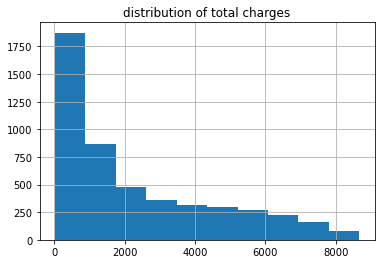

In [143]:
## distribution of Total charges
import matplotlib.pyplot as plt
train_s.TotalCharges.hist()
plt.title("distribution of total charges")
plt.show()

In [144]:
##use median of total charges to impute missing values
train_s['TotalCharges'] = train_s.TotalCharges.fillna(train_s.TotalCharges.median())

<ipython-input-144-d3242803f356>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s['TotalCharges'] = train_s.TotalCharges.fillna(train_s.TotalCharges.median())


In [145]:
##same for Validation set
val_s['TotalCharges'] = val_s.TotalCharges.fillna(val_s.TotalCharges.median())

<ipython-input-145-9c5365151642>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_s['TotalCharges'] = val_s.TotalCharges.fillna(val_s.TotalCharges.median())


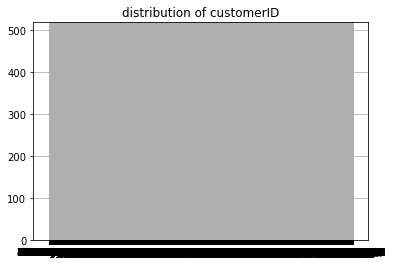

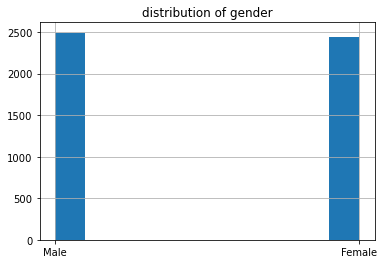

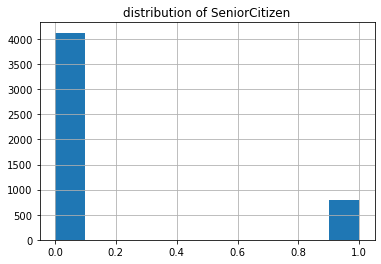

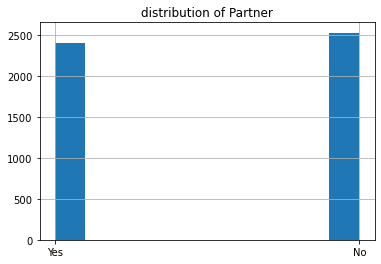

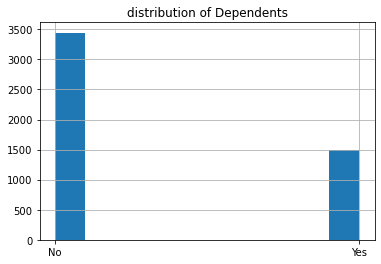

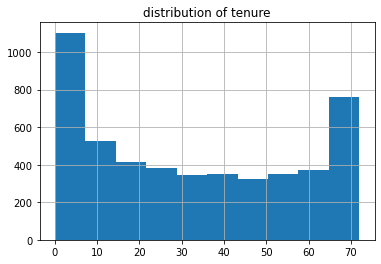

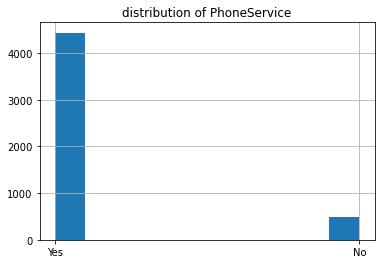

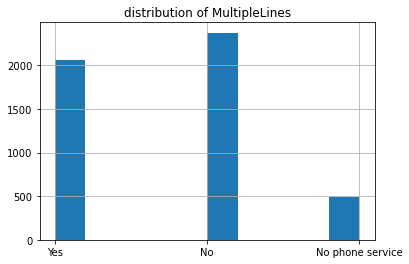

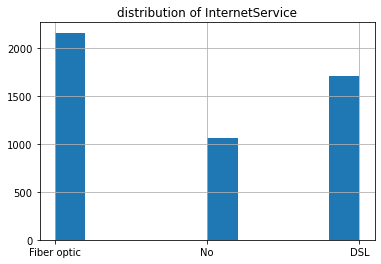

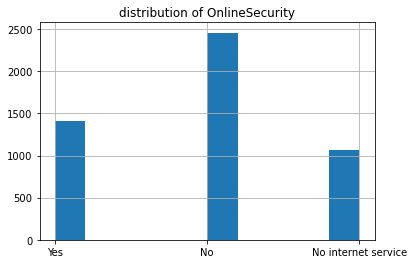

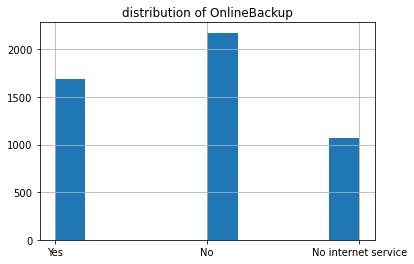

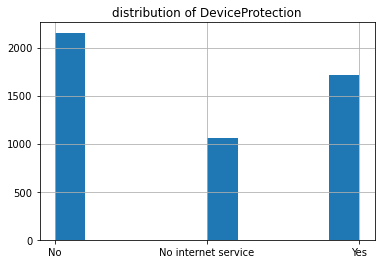

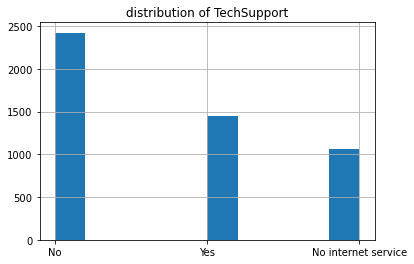

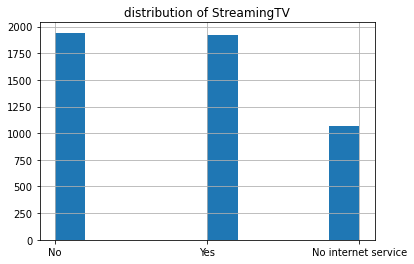

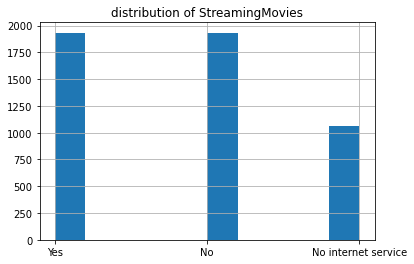

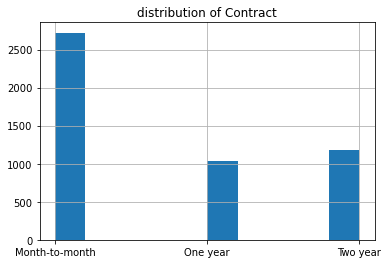

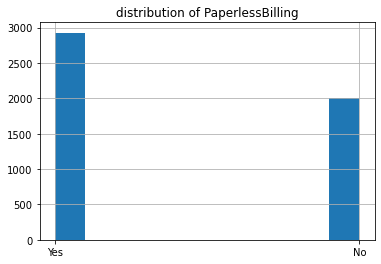

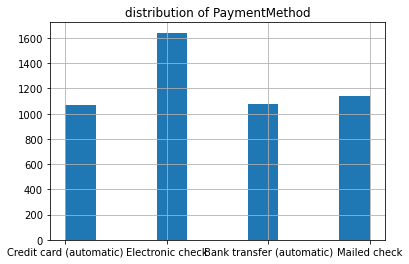

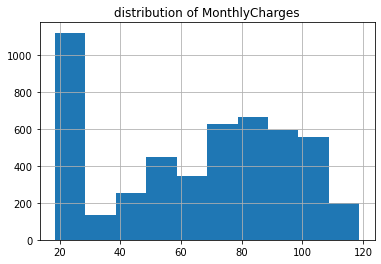

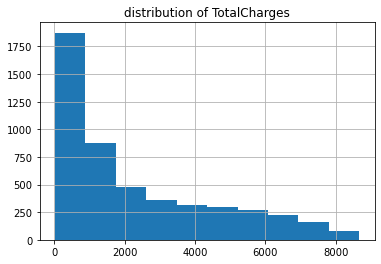

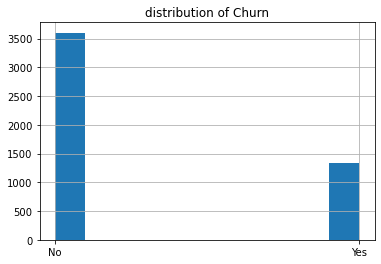

In [146]:
## check the distribution for the rest of the vars
for i in train_s.columns:
    train_s[i].hist()
    plt.title("distribution of "+i)
    plt.show()

In [147]:
##split out the label and predictors
train_x = train_s.drop('Churn', axis=1)

In [148]:
train_y = train_s.Churn

In [149]:
## same for val set
val_x = val_s.drop('Churn', axis=1)
val_y = val_s.Churn

In [150]:
train_y = train_y.map(lambda x:1 if x == "Yes" else 0)

In [151]:
val_y = val_y.map(lambda x:1 if x=="Yes" else 0)

In [152]:
## get a list for categorical vars 
cat_vars = churn_feature_df[churn_feature_df.unique_counts<=4].Feature.tolist()

In [153]:
cat_vars.remove("Churn")

In [154]:
for i in cat_vars:
    temp = pd.get_dummies(train_x[i], prefix = i, drop_first =True)
    train_x = pd.concat([train_x, temp], axis =1 )
    del train_x[i]
    temp = pd.get_dummies(val_x[i], prefix = i, drop_first =True)
    val_x = pd.concat([val_x, temp], axis =1 )
    del val_x[i]

In [155]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 899 to 809
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             4930 non-null   object 
 1   tenure                                 4930 non-null   int64  
 2   MonthlyCharges                         4930 non-null   float64
 3   TotalCharges                           4930 non-null   float32
 4   gender_Male                            4930 non-null   uint8  
 5   SeniorCitizen_1                        4930 non-null   uint8  
 6   Partner_Yes                            4930 non-null   uint8  
 7   Dependents_Yes                         4930 non-null   uint8  
 8   PhoneService_Yes                       4930 non-null   uint8  
 9   MultipleLines_No phone service         4930 non-null   uint8  
 10  MultipleLines_Yes                      4930 non-null   uint8  
 11  Int

In [156]:
## customerID is not a useful predictor, thus should be deleted
del train_x['customerID']
del val_x['customerID']

In [157]:
## normalization for numeric vars
for i in ['tenure', 'MonthlyCharges','TotalCharges']:
    mean = train_x[i].mean()
    std = train_x[i].std()
    train_x[i] = (train_x[i] - mean)/std
    val_x[i] = (val_x[i] - mean)/std

In [158]:
train_x.describe()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000,...,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000,4930.00000
mean,0.00000,0.00000,-0.00000,0.50548,0.16268,0.48763,0.30162,0.90041,0.09959,0.41846,...,0.21582,0.39026,0.21582,0.39189,0.20994,0.23813,0.59371,0.21704,0.33306,0.23124
std,1.00000,1.00000,1.00000,0.50002,0.36911,0.49990,0.45901,0.29949,0.29949,0.49336,...,0.41143,0.48786,0.41143,0.48822,0.40731,0.42598,0.49119,0.41227,0.47136,0.42167
min,-1.33121,-1.54188,-1.00620,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,-0.96311,-0.97134,-0.83410,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,-0.14510,0.18511,-0.38463,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
75%,0.95921,0.83460,0.65871,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,...,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
max,1.61361,1.79408,2.82695,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [159]:
val_x.describe()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000,...,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000,2113.00000
mean,-0.02406,-0.00223,-0.01251,0.50308,0.16091,0.47231,0.29484,0.90961,0.09039,0.42972,...,0.21865,0.37056,0.21865,0.37861,0.20729,0.24657,0.58874,0.21391,0.34217,0.22338
std,1.01493,1.00121,1.01150,0.50011,0.36753,0.49935,0.45608,0.28681,0.28681,0.49515,...,0.41343,0.48307,0.41343,0.48516,0.40546,0.43112,0.49218,0.41016,0.47455,0.41661
min,-1.33121,-1.54687,-1.00618,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,-1.00401,-0.97508,-0.84524,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,-0.18600,0.18344,-0.42002,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
75%,0.91831,0.83335,0.67336,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,...,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000
max,1.61361,1.79076,2.83242,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


<AxesSubplot:>

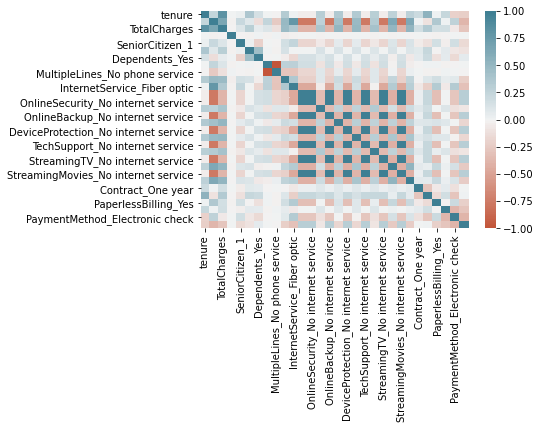

In [160]:
import seaborn as sns
sns.heatmap(train_x.corr(), annot =False, vmin =-1, vmax =1, center =0,
           cmap=sns.diverging_palette(20, 220, n=200))

Now the dataset is ready for initial modeling.

## 4 Feature selection and logistic regression with L1 penalty.

### a. Build a logistic regression model using all the raw inputs in the dataset. provide a list of the variables that have coefficients shrunk to zero.

In [161]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [162]:
logit1 = LogisticRegression(random_state = 9660, penalty='l1', solver = 'liblinear',
                            C=0.1).fit(train_x, train_y)

In [163]:
logit1.coef_

array([[-0.91621301,  0.8838967 ,  0.07284516,  0.        ,  0.11554472,
         0.        , -0.08421895, -0.9442339 ,  0.        ,  0.10338584,
         0.1286242 ,  0.        ,  0.        , -0.47932093,  0.        ,
        -0.27707376,  0.        , -0.04988156,  0.        , -0.46707549,
         0.        ,  0.        ,  0.        ,  0.        , -0.62336968,
        -1.122587  ,  0.29772535, -0.04135838,  0.29974963,  0.        ]])

In [164]:
logit1_coef = pd.DataFrame(zip(train_x.columns,logit1.coef_[0]), columns=['feature', 'coef'])
logit1_coef

,feature,coef
0,tenure,-0.91621
1,MonthlyCharges,0.88390
2,TotalCharges,0.07285
3,gender_Male,0.00000
4,SeniorCitizen_1,0.11554
5,Partner_Yes,0.00000
6,Dependents_Yes,-0.08422
7,PhoneService_Yes,-0.94423
8,MultipleLines_No phone service,0.00000
9,MultipleLines_Yes,0.10339


In [165]:
logit1_coef.sort_values(by=['coef'])

,feature,coef
25,Contract_Two year,-1.12259
7,PhoneService_Yes,-0.94423
0,tenure,-0.91621
24,Contract_One year,-0.62337
13,OnlineSecurity_Yes,-0.47932
19,TechSupport_Yes,-0.46708
15,OnlineBackup_Yes,-0.27707
6,Dependents_Yes,-0.08422
17,DeviceProtection_Yes,-0.04988
27,PaymentMethod_Credit card (automatic),-0.04136


In [166]:
logit1_coef_0 = logit1_coef[logit1_coef.coef==0].feature.tolist()

In [167]:
## this is the list of the coef which shrunk to 0 in logit1 model.
print(logit1_coef_0)

['gender_Male', 'Partner_Yes', 'MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'PaymentMethod_Mailed check']


In [168]:
## there are 13 vars shrunk to 0
len(logit1_coef_0)

13

### Next, try varying values of C. like in part1, use k-fold cv on the training set to optimize this parameter value. Report this paramenter value. using this optimized model, calculate the precision, recall, accuracy, and AUC for the model based off the training set and validation set.

In [169]:
## create a list for first round Cs
Cs = list(range(1,50))+(list(np.arange(0.1,1,0.1)))

In [170]:
logit2 = LogisticRegressionCV(random_state = 9660, penalty = 'l1', solver = 'liblinear', Cs =Cs).fit(train_x,train_y)

In [171]:
logit2.C_

array([0.4])

In [172]:
logit2_coef = pd.DataFrame(zip(train_x.columns,logit2.coef_[0]), columns=['feature', 'coef'])
logit2_coef.sort_values(by=['coef'])

,feature,coef
0,tenure,-1.29813
25,Contract_Two year,-1.28217
7,PhoneService_Yes,-0.94033
24,Contract_One year,-0.67037
13,OnlineSecurity_Yes,-0.48451
19,TechSupport_Yes,-0.45795
15,OnlineBackup_Yes,-0.31356
22,StreamingMovies_No internet service,-0.22430
27,PaymentMethod_Credit card (automatic),-0.09885
6,Dependents_Yes,-0.08138


### The optimal parameter value is 0.4

In [173]:
##def a function for logistic model evaluation
def logit_eva(x,y,model,train_val):
    name = str(train_val)+"_"
    yhat = model.predict(x)
    prob = model.predict_proba(x)
    accuracy = metrics.accuracy_score(y, yhat)
    precision = metrics.precision_score(y, yhat)
    recall = metrics.recall_score(y, yhat)
    fpr, tpr, threshold = metrics.roc_curve(y, prob[:,1], pos_label=1)
    auc = metrics.auc(fpr, tpr)
    f1 = metrics.f1_score(y, yhat)
    value_list = [accuracy, precision, recall, auc, f1]
    name_list = ['accuracy','precision','recall','auc', 'F1_score']
    df = pd.DataFrame(zip(name_list, value_list), columns=['metric','value'])
    plt.plot(fpr, tpr)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.plot([0, 1], [0, 1], color = 'black', linestyle = "dashed")
    plt.title(str(train_val)+" set ROC")
    plt.show()
    return df

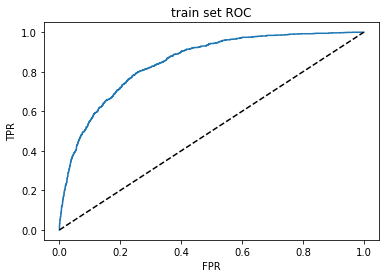

,metric,value
0,accuracy,0.80568
1,precision,0.66667
2,recall,0.55831
3,auc,0.84895
4,F1_score,0.60770


In [174]:
##evaluation for train set
logit2_train_df = logit_eva(x=train_x, y=train_y, model = logit2, train_val = "train")
logit2_train_df

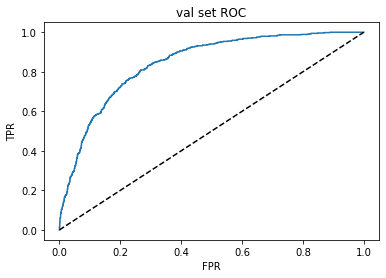

,metric,value
0,accuracy,0.80407
1,precision,0.62600
2,recall,0.57963
3,auc,0.84376
4,F1_score,0.60192


In [175]:
## evaluation for val set
logit2_val_df = logit_eva(x=val_x, y= val_y, model = logit2, train_val = "val")
logit2_val_df

    The validation set perform largely inline with the training set

### C. re-do part b with no penalty

In [256]:
logit3 = LogisticRegression(random_state = 9660, penalty ="none").fit(train_x,train_y)

In [257]:
logit3.coef_

array([[-6.19587143e-01, -1.94603651e+00,  2.42180588e-03,
         6.43630925e-02,  1.68179702e-01,  3.11988352e-02,
        -5.52034721e-02, -7.86906921e-01, -1.60875847e+00,
         7.67967720e-01,  2.59361789e+00, -3.55959863e-01,
        -3.55959863e-01,  3.33105431e-02, -3.55959863e-01,
         1.51115163e-01, -3.55959863e-01,  4.26180443e-01,
        -3.55959863e-01,  5.20935685e-02, -3.55959863e-01,
         2.93990305e-01, -3.55959863e-01,  3.38468907e-01,
        -6.98308202e-01, -1.49067506e+00,  3.96373655e-01,
        -1.01384440e-01,  2.35988143e-01, -1.65928087e-01,
        -1.89392012e-02,  6.32459212e-01, -7.51891252e-02,
         4.57022275e-01]])

In [258]:
logit3_coef = pd.DataFrame(zip(train_x.columns,logit3.coef_[0]), columns=['feature', 'coef'])
logit3_coef.sort_values(by=['coef'])

,feature,coef
1,MonthlyCharges,-1.94604
8,MultipleLines_No phone service,-1.60876
25,Contract_Two year,-1.49068
7,PhoneService_Yes,-0.78691
24,Contract_One year,-0.69831
0,tenure,-0.61959
22,StreamingMovies_No internet service,-0.35596
20,StreamingTV_No internet service,-0.35596
18,TechSupport_No internet service,-0.35596
14,OnlineBackup_No internet service,-0.35596


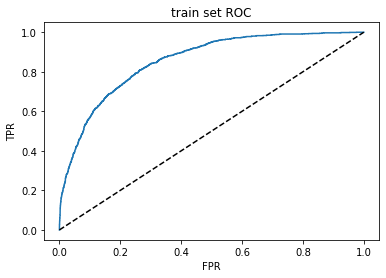

,metric,value
0,accuracy,0.81136
1,precision,0.68421
2,recall,0.55756
3,auc,0.85507
4,F1_score,0.61443


In [259]:
##evaluation for train set
logit3_train_df = logit_eva(x=train_x, y=train_y, model = logit3, train_val = "train")
logit3_train_df

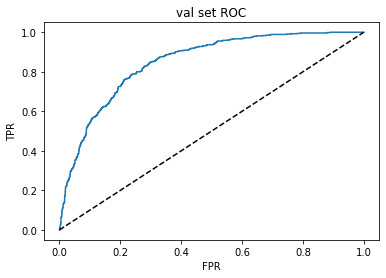

,metric,value
0,accuracy,0.80360
1,precision,0.62575
2,recall,0.57593
3,auc,0.84759
4,F1_score,0.59981


In [260]:
## evaluation for val set
logit3_val_df = logit_eva(x=val_x, y= val_y, model = logit3, train_val = "val")
logit3_val_df

Compare with the model with l1 penalty and without penalty

In [261]:
pd.concat([logit2_train_df, logit3_train_df.value], axis =1)

,metric,value,value
0,accuracy,0.80568,0.81136
1,precision,0.66667,0.68421
2,recall,0.55831,0.55756
3,auc,0.84895,0.85507
4,F1_score,0.60770,0.61443


In [182]:
pd.concat([logit2_val_df, logit3_val_df.value], axis =1)

,metric,value,value
0,accuracy,0.80407,0.80549
1,precision,0.62600,0.62926
2,recall,0.57963,0.58148
3,auc,0.84376,0.84363
4,F1_score,0.60192,0.60443


The coeffients for the model without penalty(logit3) did not shrunk to 0.
There are 13 coeffients for the model with L1 penalty(logit2) shrunk to 0
There performance of these two models are very similiar.

In [183]:
train_y.value_counts()

0    3601
1    1329
Name: Churn, dtype: int64

In [184]:
train_y.sum()/train_y.shape[0]

0.2695740365111562

### d. redo b) with L2 penalty.

In [185]:
logit4 = LogisticRegressionCV(random_state = 9660, penalty = 'l2', Cs =Cs).fit(train_x,train_y)

In [186]:
logit4.C_

array([0.3])

In [187]:
logit4_coef = pd.DataFrame(zip(train_x.columns,logit4.coef_[0]), columns=['feature', 'coef'])
logit4_coef.sort_values(by=['coef'])

,feature,coef
0,tenure,-1.28687
25,Contract_Two year,-1.19479
24,Contract_One year,-0.64362
13,OnlineSecurity_Yes,-0.40003
19,TechSupport_Yes,-0.37473
7,PhoneService_Yes,-0.27354
15,OnlineBackup_Yes,-0.23046
27,PaymentMethod_Credit card (automatic),-0.12278
22,StreamingMovies_No internet service,-0.10590
20,StreamingTV_No internet service,-0.10590


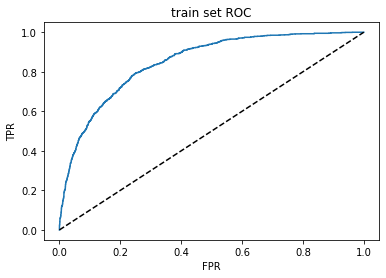

,metric,value
0,accuracy,0.80548
1,precision,0.66667
2,recall,0.55681
3,auc,0.84895
4,F1_score,0.60681


In [188]:
##evaluation for train set
logit4_train_df = logit_eva(x=train_x, y=train_y, model = logit4, train_val = "train")
logit4_train_df

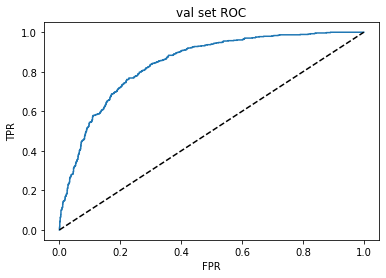

,metric,value
0,accuracy,0.80549
1,precision,0.62978
2,recall,0.57963
3,auc,0.84342
4,F1_score,0.60366


In [189]:
## evaluation for val set
logit4_val_df = logit_eva(x=val_x, y= val_y, model = logit4, train_val = "val")
logit4_val_df

In [190]:
#compare performance of the three model on training set
pd.concat([logit2_train_df, logit3_train_df.value, logit4_train_df.value], axis =1)

,metric,value,value,value
0,accuracy,0.80568,0.80548,0.80548
1,precision,0.66667,0.66577,0.66667
2,recall,0.55831,0.55907,0.55681
3,auc,0.84895,0.84900,0.84895
4,F1_score,0.60770,0.60777,0.60681


In [191]:
#compare performance of the three model on val set
pd.concat([logit2_val_df, logit3_val_df.value, logit4_val_df.value], axis =1)

,metric,value,value,value
0,accuracy,0.80407,0.80549,0.80549
1,precision,0.62600,0.62926,0.62978
2,recall,0.57963,0.58148,0.57963
3,auc,0.84376,0.84363,0.84342
4,F1_score,0.60192,0.60443,0.60366


This model with L2 penalty also perform silimar to the other two models. The coeffients do not shrunk to o too.

## Feature engineering and selection to get the best performance model

### For this particular set of data, about 27% are positive labels. It is lightly imbalance. Considering the bussiness meaning of "churn", a false negative would be losing a customer without detection. I think it might be better to have higher recall.
### In this case, I will set a threshold of 75% recall for all the model. Then the best performance model will have highest accuracy while achieving at least 75% recall.

In [192]:
## define the function for model comparison
def recall75(x,y,model):
    thresh = np.round(np.arange(0.01,1, 0.01),2).tolist()
    
    p_list =[]
    r_list =[]
    a_list =[]
    f_list =[]
    prob = model.predict_proba(x)    
    for i in thresh:
        yhat = [1 if j >= i else 0 for j in prob[:,1]]
        
        accuracy = metrics.accuracy_score(y, yhat)
        precision = metrics.precision_score(y, yhat)
        recall = metrics.recall_score(y, yhat)
        f1 = metrics.f1_score(y, yhat)
    
        p_list.append(precision)
        r_list.append(recall)
        a_list.append(accuracy)
        f_list.append(f1)

    df = pd.DataFrame(zip(thresh, p_list, r_list, a_list, f_list), 
                      columns=['threshold','precision','recall','accuracy','F1_score'])
    df = df[df.recall>=0.75].sort_values(by=["accuracy"],ascending=False)
    return df
    

In [193]:
df1 = recall75(x = train_x, y = train_y, model = logit2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [194]:

df1.iloc[0,:]

threshold   0.32000
precision   0.55599
recall      0.75094
accuracy    0.77120
F1_score    0.63892
Name: 31, dtype: float64

In [195]:
df2 = recall75(x = train_x, y = train_y, model = logit3)
df2.iloc[0,:]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


threshold   0.31000
precision   0.55239
recall      0.75771
accuracy    0.76917
F1_score    0.63896
Name: 30, dtype: float64

In [196]:
df3 = recall75(x = train_x, y = train_y, model = logit4)
df3.iloc[0,:]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


threshold   0.31000
precision   0.55055
recall      0.75395
accuracy    0.76775
F1_score    0.63639
Name: 30, dtype: float64

By the definition I just set, the model with L1 penalty(logit2) is better. Let's see if we can improve it by feature engineering.

From the heatmap of correlation matrix we can see there are a lot variables which are highly correlated.

In [197]:
logit2_coef.sort_values(by=['coef'])

,feature,coef
0,tenure,-1.29813
25,Contract_Two year,-1.28217
7,PhoneService_Yes,-0.94033
24,Contract_One year,-0.67037
13,OnlineSecurity_Yes,-0.48451
19,TechSupport_Yes,-0.45795
15,OnlineBackup_Yes,-0.31356
22,StreamingMovies_No internet service,-0.22430
27,PaymentMethod_Credit card (automatic),-0.09885
6,Dependents_Yes,-0.08138


In [198]:
## creates new feature for the customer's monthly/total charges
train_s['MonthlyRatio']=(train_s.MonthlyCharges/train_s.TotalCharges)

<ipython-input-198-e1b3f4f93e09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s['MonthlyRatio']=(train_s.MonthlyCharges/train_s.TotalCharges)


In [199]:
train_s['MonthlyRatio'].describe()

count   4930.00000
mean       0.15363
std        0.27717
min        0.01260
25%        0.01805
50%        0.03407
75%        0.10996
max        1.00000
Name: MonthlyRatio, dtype: float64

In [200]:
## looks like there are some custumers with 0 tenure, but total charges is way higher than monthly charges
## 0 tenure could be missing values. But can't be sure. Further investigation recommand.
train_s[train_s.tenure==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyRatio
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70000,1422.05005,No,0.01385
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25000,1422.05005,No,0.01424
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00000,1422.05005,No,0.01406
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35000,1422.05005,No,0.01783
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05000,1422.05005,No,0.03941
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35000,1422.05005,No,0.05158
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85000,1422.05005,No,0.01396


In [201]:
## same for val
val_s['MonthlyRatio']=(val_s.MonthlyCharges/val_s.TotalCharges)

<ipython-input-201-99fadff8a391>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_s['MonthlyRatio']=(val_s.MonthlyCharges/val_s.TotalCharges)


In [239]:
#normalize the monthly retio
mean = train_s["MonthlyRatio"].mean()
std = train_s["MonthlyRatio"].std()
train_x["MonthlyRatio"] = (train_s["MonthlyRatio"] - mean)/std
val_x["MonthlyRatio"] = (val_s["MonthlyRatio"] - mean)/std

In [202]:
train_s.tenure.describe()

count   4930.00000
mean      32.54767
std       24.44971
min        0.00000
25%        9.00000
50%       29.00000
75%       56.00000
max       72.00000
Name: tenure, dtype: float64

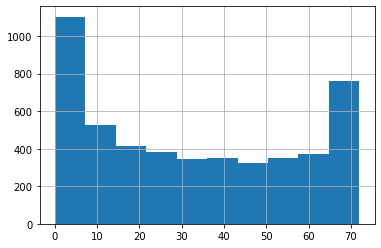

In [203]:
train_s.tenure.hist()
plt.show()

In [204]:
## the distribution of tenure has two modes. may be cut it into two categories would be better
## create a new feature to flag new customer, use median of tenure as a cutoff.
train_s['new_customer'] = train_s.tenure.map(lambda x: 1 if x < train_s.tenure.median() else 0)

<ipython-input-204-9cd50f9af37a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s['new_customer'] = train_s.tenure.map(lambda x: 1 if x < train_s.tenure.median() else 0)


In [205]:

val_s['new_customer'] = val_s.tenure.map(lambda x: 1 if x < train_s.tenure.median() else 0)

<ipython-input-205-80564ed4a383>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_s['new_customer'] = val_s.tenure.map(lambda x: 1 if x < train_s.tenure.median() else 0)


In [238]:
## add to the train_x and val_x
train_x["new_customer"] = train_s["new_customer"]
val_x["new_customer"]= val_s["new_customer"]

### another character of this dataset is that some of the variables are hierarchical.To  be specific, the PhoneService and MultipleLines
### and the group of no_internet related features. 
### the problem is that these features are corralted and also takes a lot of dimensions.
### I think we can combine the related features to a new feature?
### the idea is that PhoneService+MultipleServices, the potetial value would be 0, 1, 2


In [206]:
train_x['phone']=train_x['PhoneService_Yes']+train_x['MultipleLines_Yes']
val_x['phone'] = val_x['PhoneService_Yes'] + val_x['MultipleLines_Yes']

<AxesSubplot:>

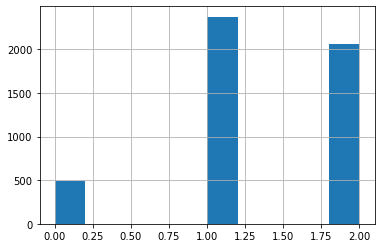

In [207]:
train_x['phone'].hist()

In [208]:
train_x['phone'].value_counts()

1    2376
2    2063
0     491
Name: phone, dtype: int64

I think it is ok to leave this variable as it without on hot encoding because this feature is an ordinal categorical variables. Having multiple lines implies a higher level. Also I am taking the risk here by making the assumption that the difference between the two levels is the same.

In [211]:
churn_feature_df

,Feature,unique_counts,unique_values
0,customerID,4930,"[2267-FPIMA, 3982-DQLUS, 0089-IIQKO, 4097-YODC..."
1,gender,2,"[Male, Female]"
2,SeniorCitizen,2,"[0, 1]"
3,Partner,2,"[Yes, No]"
4,Dependents,2,"[No, Yes]"
5,tenure,73,"[50, 65, 39, 34, 37, 66, 56, 11, 18, 7, 24, 41..."
6,PhoneService,2,"[Yes, No]"
7,MultipleLines,3,"[Yes, No, No phone service]"
8,InternetService,3,"[Fiber optic, No, DSL]"
9,OnlineSecurity,3,"[Yes, No, No internet service]"


In [229]:
## now we are getting into the streaming related features
## similar logit to the phone related feature. combine these features together so more service higher level

In [234]:
train_x["Streaming"] = train_x["StreamingMovies_Yes"]+train_x["StreamingTV_Yes"]
val_x["Streaming"] = val_x["StreamingMovies_Yes"]+val_x["StreamingTV_Yes"]

In [237]:
train_x["Streaming"].value_counts()

0    2458
2    1384
1    1088
Name: Streaming, dtype: int64

In [280]:
len(train_x.columns)

34

In [ ]:
## now there are 34 features

In [249]:
## evaluate first set of features
train_x1 = train_x
val_x1= val_x

In [282]:
train_x1.drop(["StreamingMovies_Yes", "StreamingTV_Yes", "phone","MonthlyRatio"], axis =1, inplace = True)
val_x1.drop(["StreamingMovies_Yes", "StreamingTV_Yes", "phone","MonthlyRatio"],axis=1, inplace = True)

In [300]:
## fit a model logit5 here.
logit5 = LogisticRegression(random_state = 9660, penalty ="none").fit(train_x1,train_y)

In [301]:
logit5_coef = pd.DataFrame(zip(train_x1.columns,logit5.coef_[0]), columns=['feature', 'coef'])
logit5_coef.sort_values(by=['coef'])

,feature,coef
11,InternetService_No,-2.48231
1,MonthlyCharges,-2.05984
0,tenure,-1.71498
8,MultipleLines_No phone service,-1.50174
17,Contract_Two year,-1.29719
7,PhoneService_Yes,-0.70421
16,Contract_One year,-0.68022
23,new_customer,-0.46083
19,PaymentMethod_Credit card (automatic),-0.13411
21,PaymentMethod_Mailed check,-0.09076


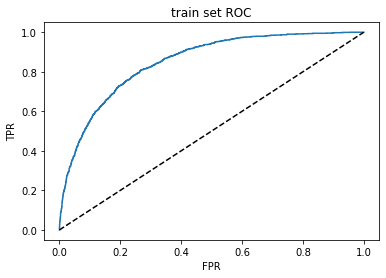

,metric,value
0,accuracy,0.80527
1,precision,0.66488
2,recall,0.55982
3,auc,0.85022
4,F1_score,0.60784


In [302]:
logit5_train_df = logit_eva(x=train_x1, y=train_y, model = logit5, train_val = "train")
logit5_train_df

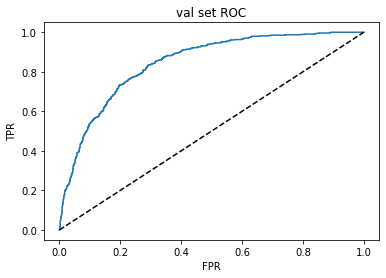

,metric,value
0,accuracy,0.79508
1,precision,0.60470
2,recall,0.57222
3,auc,0.84420
4,F1_score,0.58801


In [303]:
logit5_val_df = logit_eva(x=val_x1, y=val_y, model = logit5, train_val = "val")
logit5_val_df

In [304]:
pd.concat([logit2_val_df, logit3_val_df.value, logit4_val_df.value, logit5_val_df.value], axis =1)

,metric,value,value,value,value
0,accuracy,0.80407,0.80360,0.80549,0.79508
1,precision,0.62600,0.62575,0.62978,0.60470
2,recall,0.57963,0.57593,0.57963,0.57222
3,auc,0.84376,0.84759,0.84342,0.84420
4,F1_score,0.60192,0.59981,0.60366,0.58801


In [305]:
df5 = recall75(x = train_x1, y = train_y, model = logit5)
df5.iloc[0,:]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


threshold   0.32000
precision   0.55822
recall      0.75395
accuracy    0.77282
F1_score    0.64149
Name: 31, dtype: float64

In [306]:
## the accuracy is slightly improved with a 75% recall threshood.

In [273]:
## get a new set of features
train_x2 = train_x
val_x2= val_x

In [290]:
train_x2.drop(["StreamingMovies_No internet service","StreamingTV_No internet service","TechSupport_No internet service","OnlineBackup_No internet service","OnlineSecurity_No internet service","DeviceProtection_No internet service"], axis =1, inplace = True)
val_x2.drop(["StreamingMovies_No internet service","StreamingTV_No internet service","TechSupport_No internet service","OnlineBackup_No internet service","OnlineSecurity_No internet service","DeviceProtection_No internet service"], axis =1, inplace = True)

In [291]:
## fit a model logit6 here.
logit6 = LogisticRegression(random_state = 9660, penalty ="none").fit(train_x2,train_y)

In [294]:
logit6.coef_

array([[-1.71497928, -2.0598357 ,  0.71371331,  0.07037504,  0.17225677,
        -0.00867114, -0.08099397, -0.70421187, -1.50173552,  0.63866778,
         2.48979693, -2.4823061 , -0.05254414,  0.10758293,  0.36921438,
        -0.02971231, -0.68021602, -1.29719116,  0.38674647, -0.13411067,
         0.26891034, -0.09076439,  0.87816174, -0.4608293 ]])

In [307]:
logit6_coef = pd.DataFrame(zip(train_x2.columns,logit6.coef_[0]), columns=['feature', 'coef'])
logit6_coef.sort_values(by=['coef'])

,feature,coef
11,InternetService_No,-2.48231
1,MonthlyCharges,-2.05984
0,tenure,-1.71498
8,MultipleLines_No phone service,-1.50174
17,Contract_Two year,-1.29719
7,PhoneService_Yes,-0.70421
16,Contract_One year,-0.68022
23,new_customer,-0.46083
19,PaymentMethod_Credit card (automatic),-0.13411
21,PaymentMethod_Mailed check,-0.09076


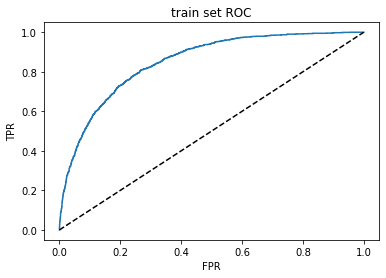

,metric,value
0,accuracy,0.80527
1,precision,0.66488
2,recall,0.55982
3,auc,0.85022
4,F1_score,0.60784


In [308]:
logit6_train_df = logit_eva(x=train_x2, y=train_y, model = logit6, train_val = "train")
logit6_train_df

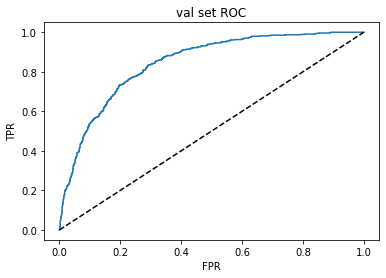

,metric,value
0,accuracy,0.79508
1,precision,0.60470
2,recall,0.57222
3,auc,0.84420
4,F1_score,0.58801


In [309]:
logit6_val_df = logit_eva(x=val_x2, y=val_y, model = logit6, train_val = "val")
logit6_val_df

In [311]:
pd.concat([logit2_val_df, logit3_val_df.value, logit4_val_df.value, logit5_val_df.value, logit6_val_df.value], axis =1)

,metric,value,value,value,value,value
0,accuracy,0.80407,0.80360,0.80549,0.79508,0.79508
1,precision,0.62600,0.62575,0.62978,0.60470,0.60470
2,recall,0.57963,0.57593,0.57963,0.57222,0.57222
3,auc,0.84376,0.84759,0.84342,0.84420,0.84420
4,F1_score,0.60192,0.59981,0.60366,0.58801,0.58801


In [310]:
df6 = recall75(x = train_x2, y = train_y, model = logit6)
df6.iloc[0,:]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


threshold   0.32000
precision   0.55822
recall      0.75395
accuracy    0.77282
F1_score    0.64149
Name: 31, dtype: float64

In [ ]:
## there no improvement from logit6 to logit5

## 6. What are the advantage and disadvantage of using logistic regression on this dataset?

The advantages of logitistic regreesion for this dataset would be easy implementation and relatively fast computational time. It does not have many parameters to tune. The predictors are easy to explain.

The disadvantages would be some of the variables are highly correlated. like no internet will leads to no streaming. The corralted features will result in lower performance.